In [1]:
from bs4 import BeautifulSoup as bs
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import json
from time import sleep
from datetime import date
from os import path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ano = 17
ruta = f'Rendimiento_20{ano}.csv'

In [3]:
df = pd.read_csv(ruta,sep=';')
dic = {}
for i in df.columns:
    dic[i] = i.upper()
df.rename(dic, axis=1, inplace=True)
df = df[['MRUN', 'PROM_GRAL','ASISTENCIA', 'SIT_FIN_R','COD_REG_RBD', 'COD_JOR']]

In [4]:
while ano < 20:
    ano += 1
    ruta = f'Rendimiento_20{ano}.csv'
    df_2 = pd.read_csv(ruta, sep=';')
    dic = {}
    for i in df_2.columns:
        dic[i] = i.upper()
    df_2.rename(dic, axis=1, inplace=True)
    df_2 = df_2[['MRUN', 'PROM_GRAL','ASISTENCIA', 'SIT_FIN_R','COD_REG_RBD', 'COD_JOR']]
    df = df.merge(df_2,how='inner', on=['MRUN'], suffixes=[str(ano-1),str(ano)])

In [5]:
df

,MRUN,PROM_GRAL17,ASISTENCIA17,SIT_FIN_R17,COD_REG_RBD17,COD_JOR17,PROM_GRAL18,ASISTENCIA18,SIT_FIN_R18,COD_REG_RBD18,...,PROM_GRAL19,ASISTENCIA19,SIT_FIN_R19,COD_REG_RBD19,COD_JOR19,PROM_GRAL20,ASISTENCIA20,SIT_FIN_R20,COD_REG_RBD20,COD_JOR20
0,17606725,0,0,T,15,4,0,0,T,15,...,0,0,T,15,4,0,0,T,15,4
1,17606725,0,0,T,15,4,0,0,T,15,...,0,0,T,15,4,"5,3",100,P,15,4
2,17606725,0,0,T,15,4,0,0,T,15,...,"2,6",50,R,15,4,0,0,T,15,4
3,17606725,0,0,T,15,4,0,0,T,15,...,"2,6",50,R,15,4,"5,3",100,P,15,4
4,17606725,0,0,T,15,4,0,0,T,15,...,0,0,T,15,4,0,0,T,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834926,21581850,6,99,P,10,3,"4,8",98,P,10,...,"5,2",99,P,10,3,"5,4",99,P,10,3
2834927,22239106,"6,6",98,P,10,3,"5,9",100,P,10,...,"5,7",99,P,10,3,"5,9",100,P,10,3
2834928,22242268,5,97,P,10,3,"4,6",87,P,10,...,"4,9",93,P,10,3,"5,9",100,P,10,3
2834929,22773779,"4,5",96,P,10,3,"4,7",86,P,10,...,"4,5",85,R,10,3,"6,4",100,P,10,3


In [6]:
df.columns


Index(['MRUN', 'PROM_GRAL17', 'ASISTENCIA17', 'SIT_FIN_R17', 'COD_REG_RBD17',
       'COD_JOR17', 'PROM_GRAL18', 'ASISTENCIA18', 'SIT_FIN_R18',
       'COD_REG_RBD18', 'COD_JOR18', 'PROM_GRAL19', 'ASISTENCIA19',
       'SIT_FIN_R19', 'COD_REG_RBD19', 'COD_JOR19', 'PROM_GRAL20',
       'ASISTENCIA20', 'SIT_FIN_R20', 'COD_REG_RBD20', 'COD_JOR20'],
      dtype='object')

In [7]:
# df['EDAD_ALU16'] = df['EDAD_ALU16'].astype('category')

In [9]:
# df[['EDAD_ALU16', 'PROM_GRAL16', 'PROM_GRAL17', 'PROM_GRAL18', 'PROM_GRAL19', 'PROM_GRAL20', 'PROM_GRAL21']].groupby('EDAD_ALU16').max()

In [10]:
ano = 17
ruta = f'Rendimiento_20{ano}.csv'

In [11]:
df = pd.read_csv(ruta,sep=';')
dic = {}
for i in df.columns:
    dic[i] = i.upper()
df.rename(dic, axis=1, inplace=True)
df = df[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'MRUN', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN_R']]

In [12]:
while ano < 21:
    ano += 1
    ruta = f'Rendimiento_20{ano}.csv'
    df_2 = pd.read_csv(ruta, sep=';')
    dic = {}
    for i in df_2.columns:
        dic[i] = i.upper()
    df_2.rename(dic, axis=1, inplace=True)
    df_2 = df_2[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'MRUN', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN_R']]
    df = df.merge(df_2,how='outer', on=['MRUN'], suffixes=[str(ano-1),str(ano)])

In [13]:
df

,AGNO17,RBD17,NOM_RBD17,COD_REG_RBD17,MRUN,PROM_GRAL17,ASISTENCIA17,SIT_FIN_R17,AGNO18,RBD18,...,PROM_GRAL20,ASISTENCIA20,SIT_FIN_R20,AGNO,RBD,NOM_RBD,COD_REG_RBD,PROM_GRAL,ASISTENCIA,SIT_FIN_R
0,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,708275,0,0.0,Y,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,4213631,0,0.0,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.0,5.0,JOVINA NARANJO FERNANDEZ,15.0,4213631,"6,2",93.0,P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,5111225,0,0.0,Y,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,5111225,0,0.0,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475916,NaN,NaN,NaN,NaN,23182546,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021.0,41955.0,ESCUELA HOSPITALARIA LOS ÁNGELES,8.0,"6,5",100.0,P
5475917,NaN,NaN,NaN,NaN,23182546,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021.0,41955.0,ESCUELA HOSPITALARIA LOS ÁNGELES,8.0,0,0.0,T
5475918,NaN,NaN,NaN,NaN,13703445,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021.0,41955.0,ESCUELA HOSPITALARIA LOS ÁNGELES,8.0,"6,7",100.0,P
5475919,NaN,NaN,NaN,NaN,16621128,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021.0,41955.0,ESCUELA HOSPITALARIA LOS ÁNGELES,8.0,"6,4",100.0,P


In [14]:
df.columns


Index(['AGNO17', 'RBD17', 'NOM_RBD17', 'COD_REG_RBD17', 'MRUN', 'PROM_GRAL17',
       'ASISTENCIA17', 'SIT_FIN_R17', 'AGNO18', 'RBD18', 'NOM_RBD18',
       'COD_REG_RBD18', 'PROM_GRAL18', 'ASISTENCIA18', 'SIT_FIN_R18', 'AGNO19',
       'RBD19', 'NOM_RBD19', 'COD_REG_RBD19', 'PROM_GRAL19', 'ASISTENCIA19',
       'SIT_FIN_R19', 'AGNO20', 'RBD20', 'NOM_RBD20', 'COD_REG_RBD20',
       'PROM_GRAL20', 'ASISTENCIA20', 'SIT_FIN_R20', 'AGNO', 'RBD', 'NOM_RBD',
       'COD_REG_RBD', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN_R'],
      dtype='object')

In [15]:
sup = pd.read_csv('Superior_2021.csv', sep=';')
dic = {}
for i in sup.columns:
    dic[i] = i.upper()
sup.rename(dic, axis=1, inplace=True)

In [16]:
sup.columns

Index(['CAT_PERIODO', 'ID', 'CODIGO_UNICO', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU',
       'RANGO_EDAD', 'ANIO_ING_CARR_ORI', 'SEM_ING_CARR_ORI',
       'ANIO_ING_CARR_ACT', 'SEM_ING_CARR_ACT', 'TIPO_INST_1', 'TIPO_INST_2',
       'TIPO_INST_3', 'COD_INST', 'NOMB_INST', 'COD_SEDE', 'NOMB_SEDE',
       'COD_CARRERA', 'NOMB_CARRERA', 'MODALIDAD', 'JORNADA', 'VERSION',
       'TIPO_PLAN_CARR', 'DUR_ESTUDIO_CARR', 'DUR_PROCESO_TIT',
       'DUR_TOTAL_CARR', 'REGION_SEDE', 'PROVINCIA_SEDE', 'COMUNA_SEDE',
       'NIVEL_GLOBAL', 'NIVEL_CARRERA_1', 'NIVEL_CARRERA_2',
       'REQUISITO_INGRESO', 'VIGENCIA_CARRERA', 'FORMATO_VALORES',
       'VALOR_MATRICULA', 'VALOR_ARANCEL', 'CODIGO_DEMRE', 'AREA_CONOCIMIENTO',
       'CINE_F_97_AREA', 'CINE_F_97_SUBAREA', 'AREA_CARRERA_GENERICA',
       'CINE_F_13_AREA', 'CINE_F_13_SUBAREA', 'ACREDITADA_CARR',
       'ACREDITADA_INST', 'ACRE_INST_DESDE_HASTA', 'ACRE_INST_ANIO',
       'COSTO_PROCESO_TITULACION', 'COSTO_OBTENCION_TITULO_DIPLOMA',
       'FORMA_INGR

In [17]:
sup = sup[['MRUN', 'NOMB_INST']]

In [18]:
df.merge(sup, how='inner', on= ['MRUN'])

,AGNO17,RBD17,NOM_RBD17,COD_REG_RBD17,MRUN,PROM_GRAL17,ASISTENCIA17,SIT_FIN_R17,AGNO18,RBD18,...,ASISTENCIA20,SIT_FIN_R20,AGNO,RBD,NOM_RBD,COD_REG_RBD,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOMB_INST
0,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,4213631,0,0.0,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNIVERSIDAD DE LAS AMERICAS
1,2017.0,5.0,JOVINA NARANJO FERNANDEZ,15.0,4213631,"6,2",93.0,P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNIVERSIDAD DE LAS AMERICAS
2,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,15958933,0,0.0,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP
3,2017.0,12630.0,COLEGIO LEONARDO DA VINCI,15.0,15958933,"6,7",85.0,P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP
4,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,24248363,"4,8",85.0,P,2018.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CFT DE LA REGION DE ARICA Y PARINACOTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610560,NaN,NaN,NaN,NaN,10069096,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021.0,25982.0,CENTRO EDUCACIONAL DE ADULTOS PADRE ALBERTO HU...,13.0,0,0.0,T,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE
610561,NaN,NaN,NaN,NaN,24533596,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021.0,22276.0,LICEO DE ADULTOS CRECER OSORNO,10.0,"5,8",100.0,P,IP LATINOAMERICANO DE COMERCIO EXTERIOR - IPLACEX
610562,NaN,NaN,NaN,NaN,20018853,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021.0,25818.0,COLEGIO PART. ADULTOS INSTITUTO ICEL,13.0,"4,8",85.0,P,"UNIVERSIDAD DE ARTES, CIENCIAS Y COMUNICACION ..."
610563,NaN,NaN,NaN,NaN,17414558,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021.0,26324.0,EST. EDUC. PART. ARCANGEL GABRIEL N° 2,13.0,0,0.0,Y,UNIVERSIDAD DEL DESARROLLO


In [19]:
df2 = df.dropna()

In [20]:
ano = 17
while ano < 21:
    df2[f'PROM_GRAL{ano}'] = df2[f'PROM_GRAL{ano}'].replace(',', '.', regex=True)
    df2[f'PROM_GRAL{ano}'] = df2[f'PROM_GRAL{ano}'].astype(np.float64)
    df2 = df2[df2[f'PROM_GRAL{ano}'] != 0]
    ano += 1
df2[f'PROM_GRAL'] = df2[f'PROM_GRAL'].replace(',', '.', regex=True)
df2[f'PROM_GRAL'] = df2[f'PROM_GRAL'].astype(np.float64)
df2 = df2[df2[f'PROM_GRAL'] != 0]

In [21]:
df2

,AGNO17,RBD17,NOM_RBD17,COD_REG_RBD17,MRUN,PROM_GRAL17,ASISTENCIA17,SIT_FIN_R17,AGNO18,RBD18,...,PROM_GRAL20,ASISTENCIA20,SIT_FIN_R20,AGNO,RBD,NOM_RBD,COD_REG_RBD,PROM_GRAL,ASISTENCIA,SIT_FIN_R
101,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,4822148,4.6,66.0,R,2018.0,12961.0,...,6.3,85.0,P,2021.0,12716.0,COLEGIO BICENTENARIO MIRAMAR DE EXCELENCIA,15.0,5.6,85.0,P
131,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,15256246,4.4,90.0,R,2018.0,12652.0,...,4.8,85.0,P,2021.0,12652.0,COLEGIO SANTO DOMINGO SAVIO,1.0,4.9,100.0,P
179,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,14715110,5.7,85.0,P,2018.0,12610.0,...,4.4,85.0,P,2021.0,1.0,LICEO POLITECNICO ARICA,15.0,3.3,55.0,R
193,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,17541994,5.1,89.0,P,2018.0,1.0,...,4.2,87.0,P,2021.0,1.0,LICEO POLITECNICO ARICA,15.0,3.5,80.0,R
195,2017.0,1.0,LICEO POLITECNICO ARICA,15.0,18337377,3.5,31.0,R,2018.0,10911.0,...,4.7,87.0,P,2021.0,8.0,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,15.0,4.5,85.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959311,2017.0,40459.0,CENTRO EDUCACIONAL ALBORADA,10.0,21581850,6.0,99.0,P,2018.0,8108.0,...,5.4,99.0,P,2021.0,8108.0,SEMINARIO CONCILIAR DE ANCUD,10.0,5.4,41.0,P
3959312,2017.0,40459.0,CENTRO EDUCACIONAL ALBORADA,10.0,22239106,6.6,98.0,P,2018.0,8108.0,...,5.9,100.0,P,2021.0,8108.0,SEMINARIO CONCILIAR DE ANCUD,10.0,6.1,51.0,P
3959313,2017.0,40459.0,CENTRO EDUCACIONAL ALBORADA,10.0,22242268,5.0,97.0,P,2018.0,8109.0,...,5.9,100.0,P,2021.0,8109.0,LICEO COMERCIAL EL PILAR,10.0,4.8,100.0,P
3959314,2017.0,40459.0,CENTRO EDUCACIONAL ALBORADA,10.0,22773779,4.5,96.0,P,2018.0,12192.0,...,6.4,100.0,P,2021.0,12192.0,INSTITUTO DEL MAR BICENTENARIO CAPITAN WILLIAMS,10.0,4.9,26.0,P


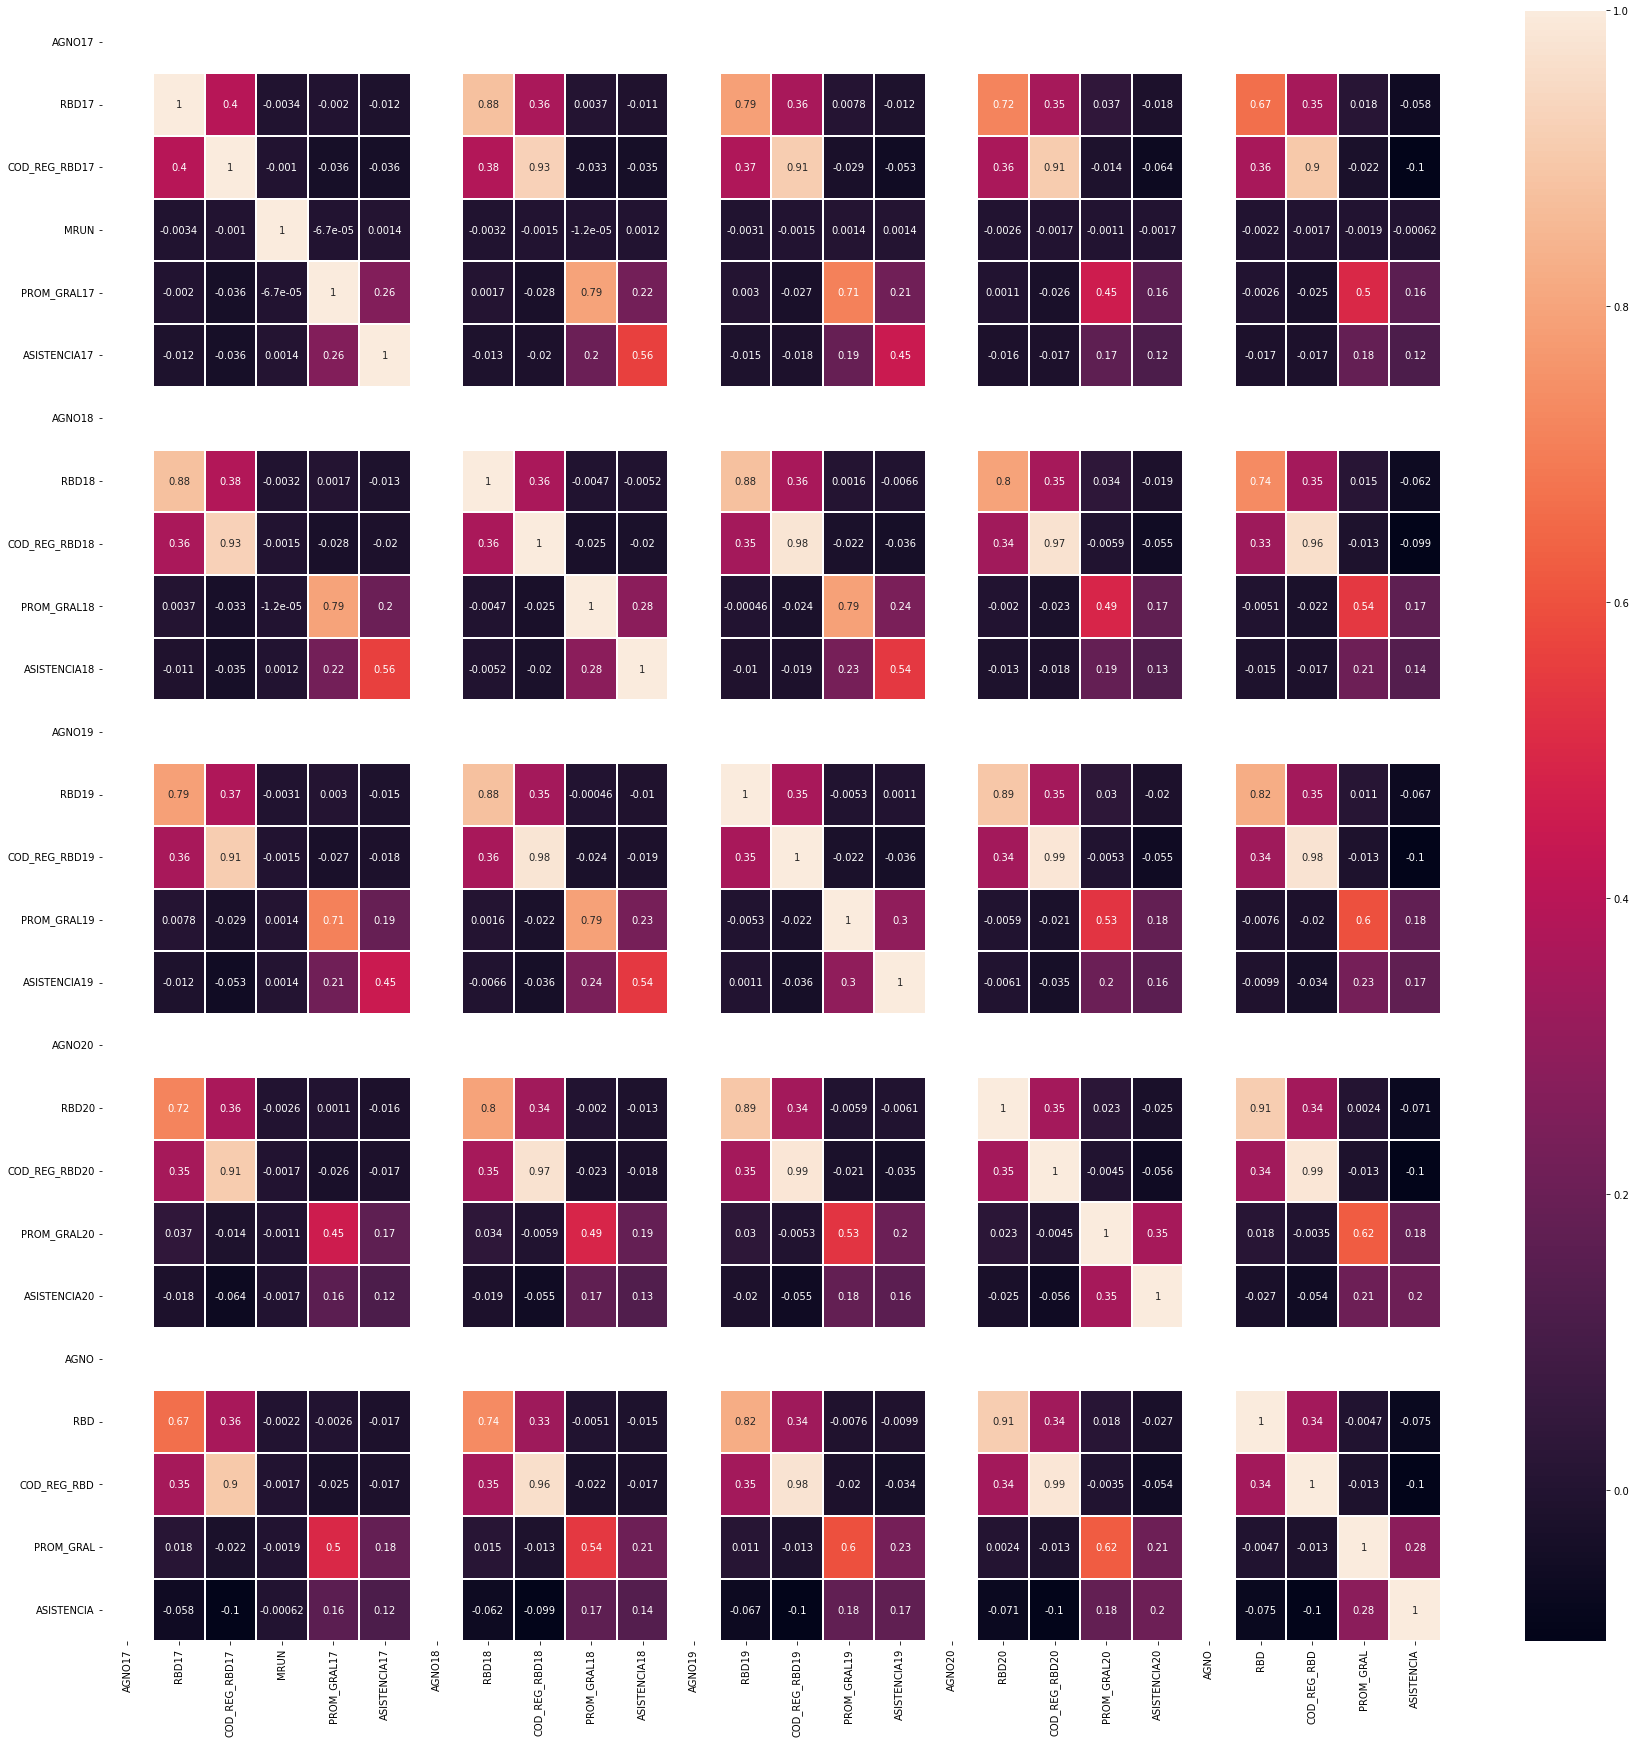

In [22]:
fig,  ax = plt.subplots(1, 1, figsize=(30, 30))

sns.heatmap(df2.corr(), annot=True, linewidths=0.05, ax=ax)
plt.show()

In [23]:
ano = 16
while ano < 21:
    ruta = f'Rendimiento_20{ano}.csv'
    df_2 = pd.read_csv(ruta, sep=';')
    dic = {}
    for i in df_2.columns:
        dic[i] = i.upper()
    df_2.rename(dic, axis=1, inplace=True)
    df_2 = df_2[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'MRUN', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN_R']]
    df_2.to_csv(f'promedios_20{ano}', index=False)
    ano += 1


In [24]:
ano = 16
while ano < 21:
    ruta = f'Rendimiento_20{ano}.csv'
    df_2 = pd.read_csv(ruta, sep=';')
    dic = {}
    for i in df_2.columns:
        dic[i] = i.upper()
    df_2.rename(dic, axis=1, inplace=True)
    df_2[f'PROM_GRAL'] = df_2[f'PROM_GRAL'].replace(',', '.', regex=True)
    df_2[f'PROM_GRAL'] = df_2[f'PROM_GRAL'].astype(np.float64)
    df_2 = df_2[df_2[f'PROM_GRAL'] != 0]
    df_2 = df_2[['MRUN', 'PROM_GRAL','ASISTENCIA', 'SIT_FIN_R','COD_COM_RBD', 'COD_JOR', 'NOM_COM_RBD']]
    df_2['COD_JOR'] = df_2['COD_JOR'].astype(np.int64)
    df_2 = df_2[(df_2['COD_JOR'] == 1) | (df_2['COD_JOR'] == 2) | (df_2['COD_JOR'] == 3)]
    df_2.to_csv(f'jornadas{ano}', index=False)
    ano += 1


In [25]:
pd.read_csv('jornadas19').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945347 entries, 0 to 2945346
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   MRUN         int64  
 1   PROM_GRAL    float64
 2   ASISTENCIA   int64  
 3   SIT_FIN_R    object 
 4   COD_COM_RBD  int64  
 5   COD_JOR      int64  
 6   NOM_COM_RBD  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 157.3+ MB


In [26]:
codigos = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132, 13201, 13202, 13401, ]

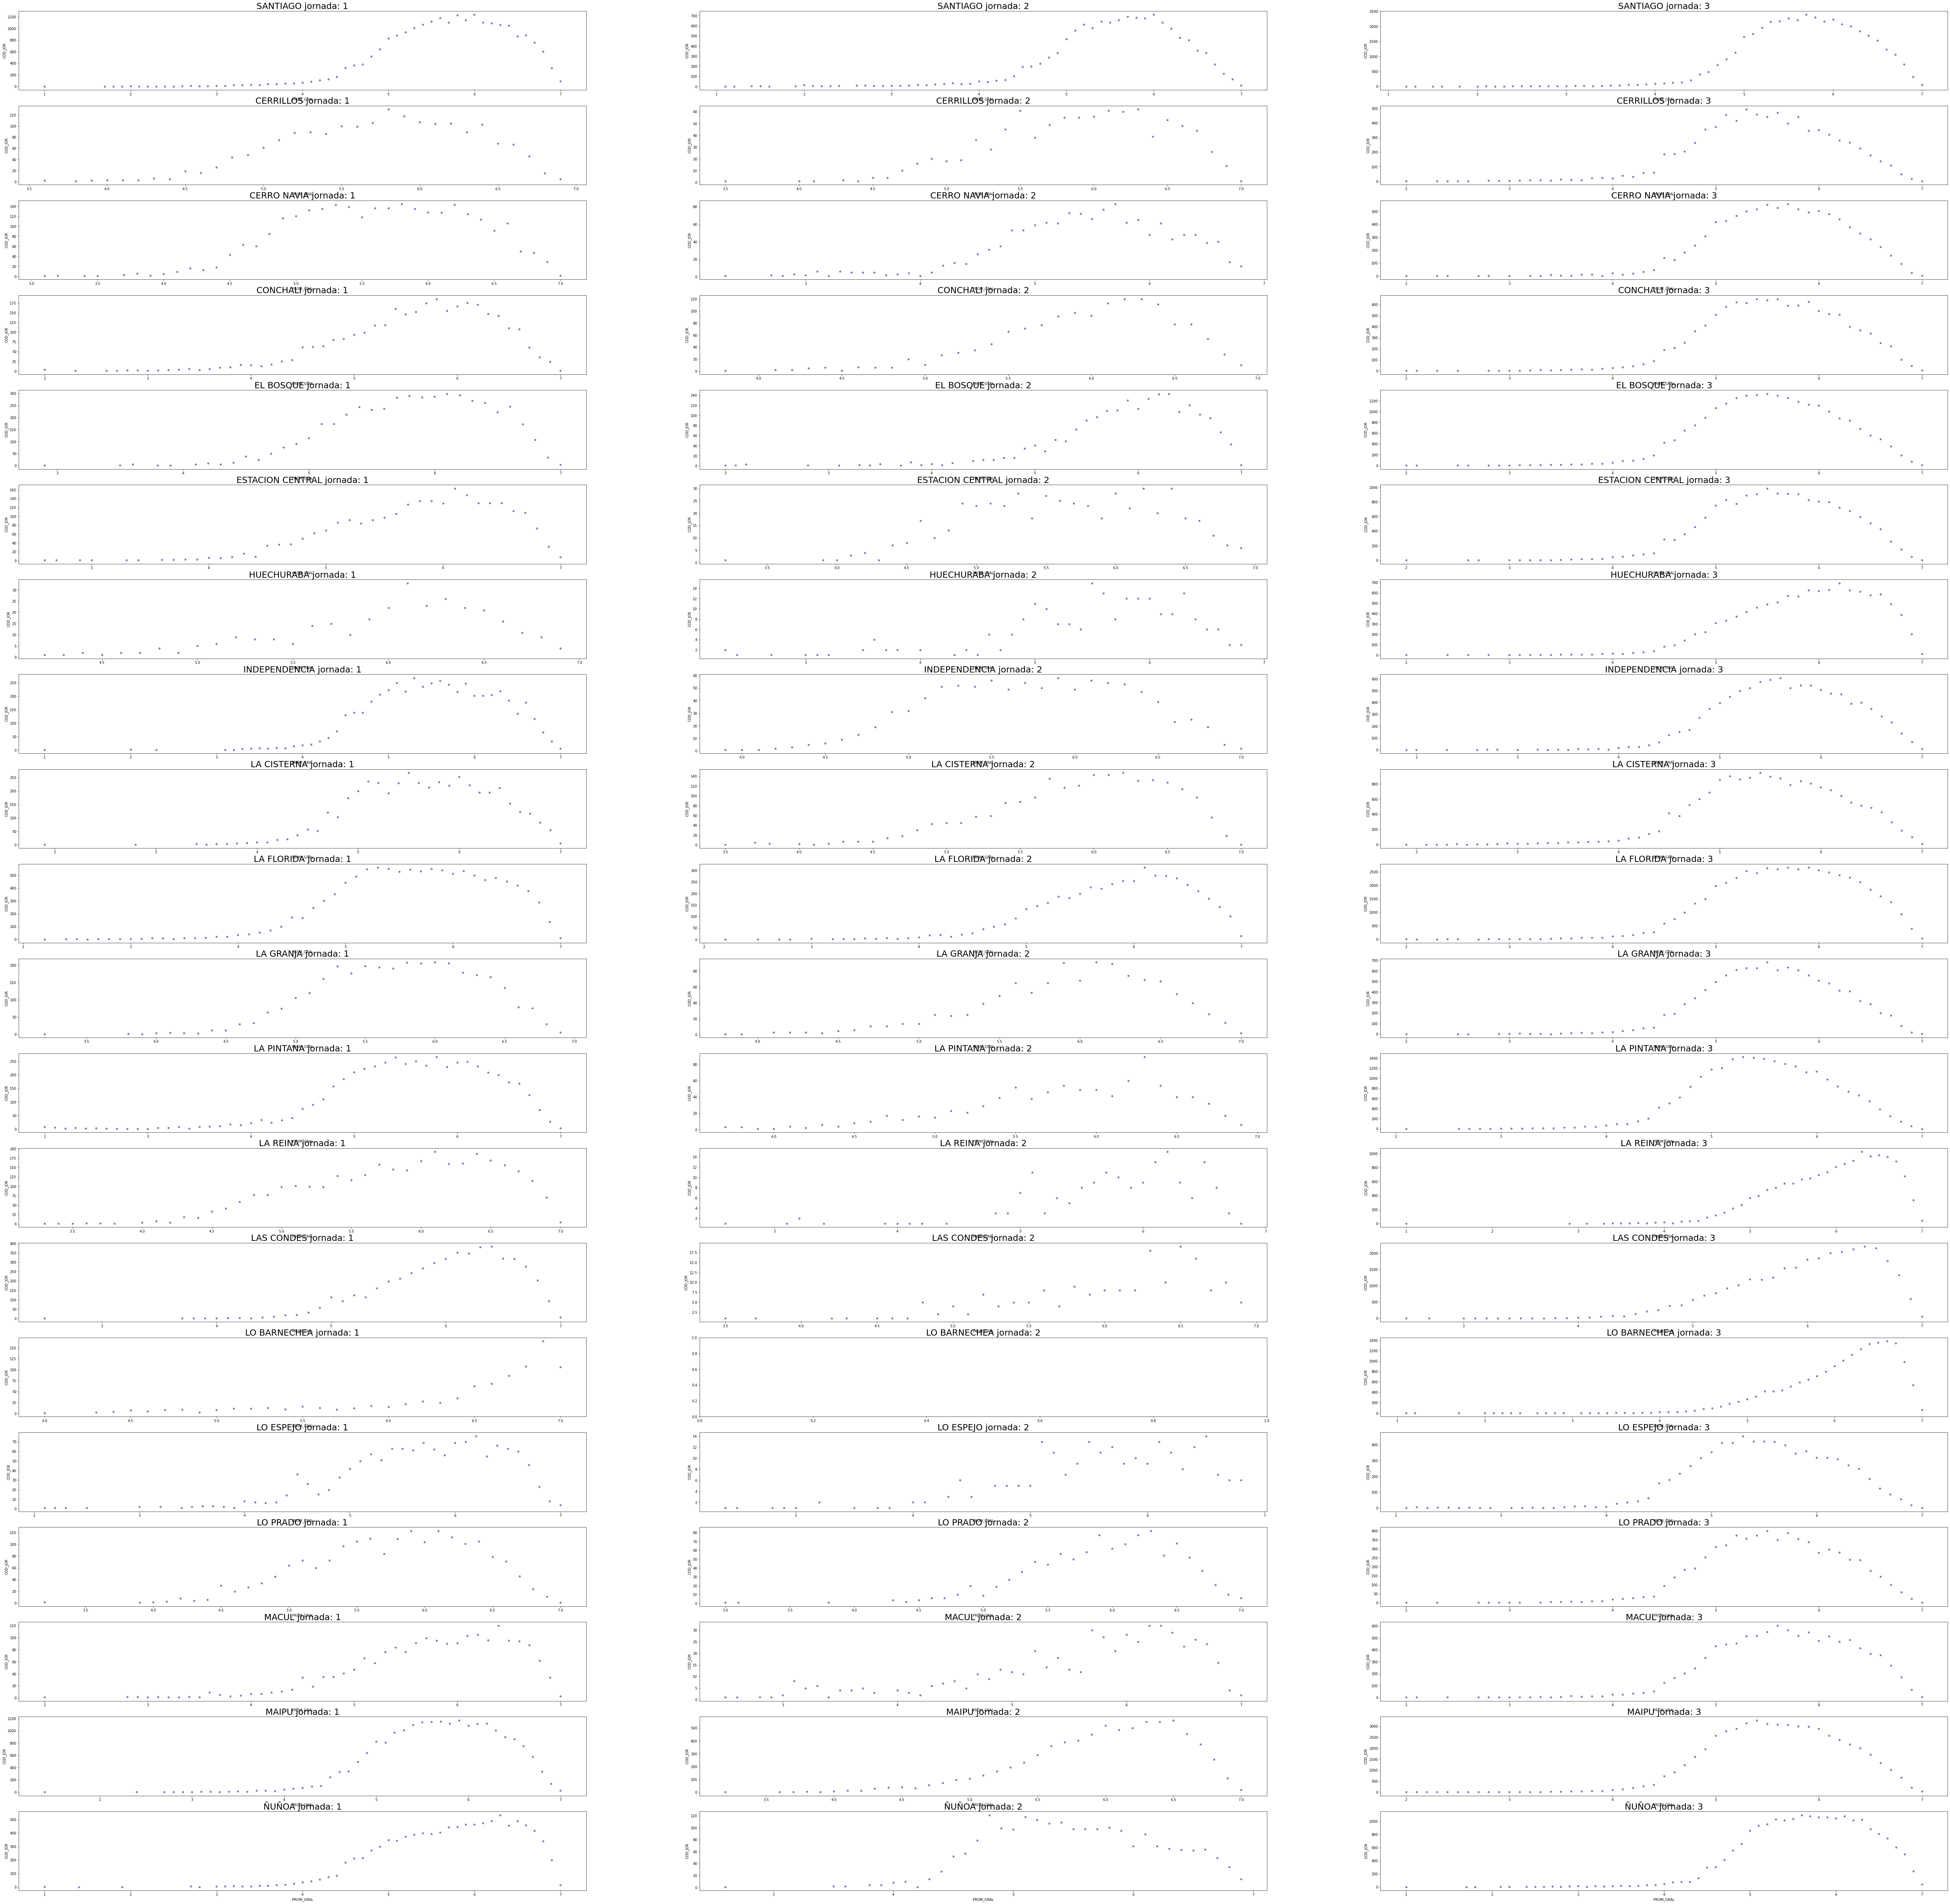

In [34]:
fig, ax = plt.subplots(20, 3, figsize=(100, 100))
ax = ax.flatten()
largo = len(codigos)
for i in range(5):
    ano = 16
    axis = 0
    df_plot = pd.read_csv(f'jornadas{16}')
    for k in range(largo):
        plot = df_plot[(df_plot['COD_COM_RBD'] == codigos[k])] # seleccionamos la comuna
        for j in range(1,4):
            try:
                plot_final = plot[(df_plot['COD_JOR'] == j)] # elegimos la jornada
                plot_final = plot_final.groupby('PROM_GRAL').count()
                axes = sns.scatterplot(data=plot_final, x='PROM_GRAL', y='COD_JOR',ax=ax[axis], legend=True)
                axes.set_title(f"{plot['NOM_COM_RBD'].iloc[0]} jornada: {j}", fontsize=25)
                axis += 1
            except:
                pass
    ano += 1
plt.show()